In [90]:
import yfinance as yf
import pandas as pd
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
import pyfolio as pf

# 个股研究

本笔记分析个股的重要数据。

In [91]:
ticker='BABA'

In [92]:
#get data from yahoo finance
yfticker=yf.Ticker(ticker)
stock_info=yfticker.info
stcok_price=yfticker.history(start=dt.date(2000,1,1),auto_adjust=True)
benchmark_price=yf.Ticker('SPY').history(start=min(stcok_price.index),auto_adjust=True)

In [93]:
stock_info
if stock_info['currency']=='USD':
    stock_info['ticker_rate']=1
else:
    stock_info['ticker_rate']=yf.Ticker('%sUSD=X'%(stock_info['currency'])).history().Close[-1]

if stock_info['financialCurrency']=='USD':
    stock_info['financial_rate']=1
else:
    stock_info['financial_rate']=yf.Ticker('%sUSD=X'%(stock_info['financialCurrency'])).history().Close[-1]


## 基本面数据

In [94]:

print('盈利能力指标')
print('Gross Margin: %.2f%%'%(100*stock_info['grossMargins']))
print('Operating Cashflow Margin: %.2f%%'%(100*stock_info['operatingCashflow']/stock_info['totalRevenue']))
print('Net Profit Margin: %.2f%%'%(100*stock_info['profitMargins']))
print('ROE: %.2f%%'%(100*stock_info['returnOnEquity']))
print('估值指标')
print('PCF: %.1f'%((stock_info['marketCap']*stock_info['ticker_rate'])/(stock_info['operatingCashflow']*stock_info['financial_rate'])))
print('PE_TTM: %.1f'%(stock_info['trailingPE']))
print('PE_FWD: %.1f'%(stock_info['forwardPE']))
print('Revenue Growth: %.2f%%'%(100*stock_info['revenueGrowth']))
print('Eps Growth: %.2f%%'%(100*stock_info['earningsGrowth']))
print('PEG: %.2f'%(stock_info['pegRatio']))
print('Target Price Mean: %.2f, %.2f%%'%(stock_info['targetMeanPrice'],100*(stock_info['targetMeanPrice']/stock_info['currentPrice']-1)))
print('Target Price Low: %.2f%%, %.2f'%(stock_info['targetLowPrice'],100*(stock_info['targetLowPrice']/stock_info['currentPrice']-1)))
print('Target Price High: %.2f%%, %.2f'%(stock_info['targetHighPrice'],100*(stock_info['targetHighPrice']/stock_info['currentPrice']-1)))

盈利能力指标
Gross Margin: 38.78%
Operating Cashflow Margin: 24.15%
Net Profit Margin: 15.30%
ROE: 11.25%
估值指标
PCF: 11.6
PE_TTM: 18.3
PE_FWD: 13.4
Revenue Growth: 29.40%
Eps Growth: -81.20%
PEG: 85.06
Target Price Mean: 208.75, 60.81%
Target Price Low: 129.71%, -0.08
Target Price High: 314.31%, 142.13


# 股价与收益率分析

In [98]:
# sns.set()
# sns.histplot(data=stcok_price['Close'].pct_change())
# plt.title('Daily Return Histgram: %i days'%(stcok_price['Close'].count()))

Start date,2014-09-22
End date,2022-01-07
Total months,87
,Backtest
Annual return,4.539%
Cumulative returns,38.258%
Annual volatility,35.273%
Sharpe ratio,0.30
Calmar ratio,0.07
Stability,0.69
Max drawdown,-64.697%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,64.70,2020-10-27,2021-12-03,NaT,NaN
1,51.83,2014-11-10,2015-09-28,2017-05-09,652
2,38.06,2018-06-14,2019-01-03,2019-12-20,397
3,23.49,2020-01-13,2020-03-23,2020-07-06,126
4,18.37,2018-01-26,2018-04-06,2018-06-04,92


Stress Events,mean,min,max
Oct14,0.47%,-3.28%,3.80%
Fall2015,-0.70%,-5.64%,5.14%
New Normal,0.04%,-13.34%,13.29%


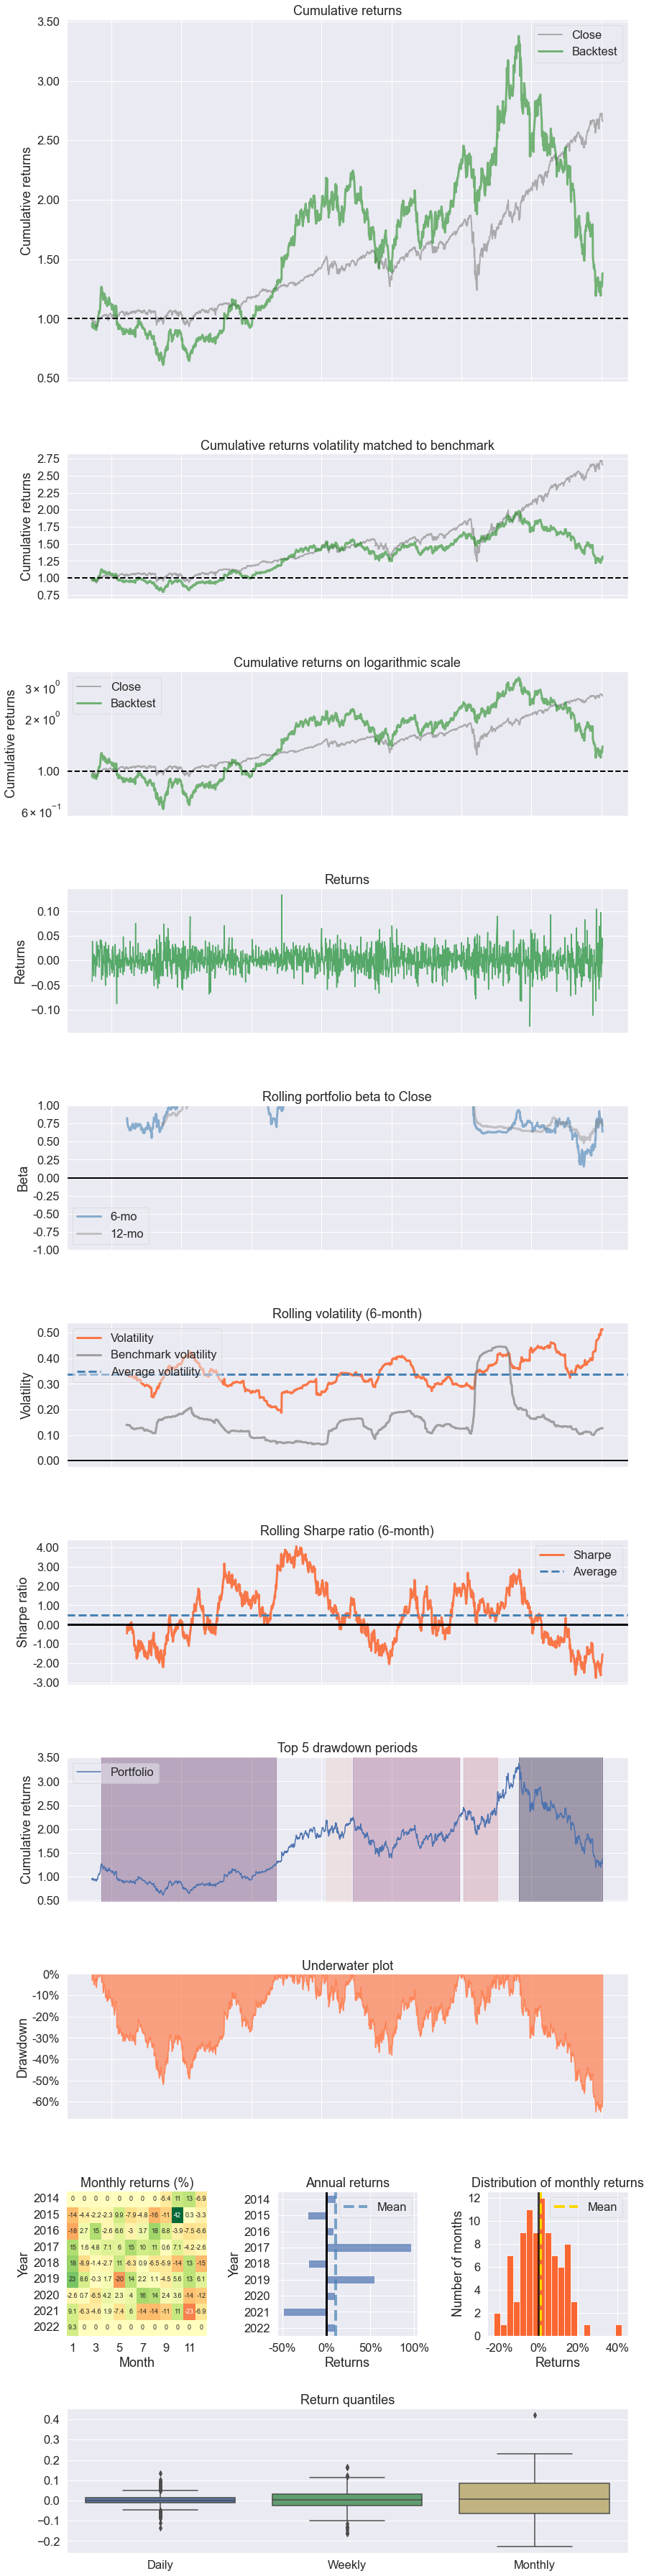

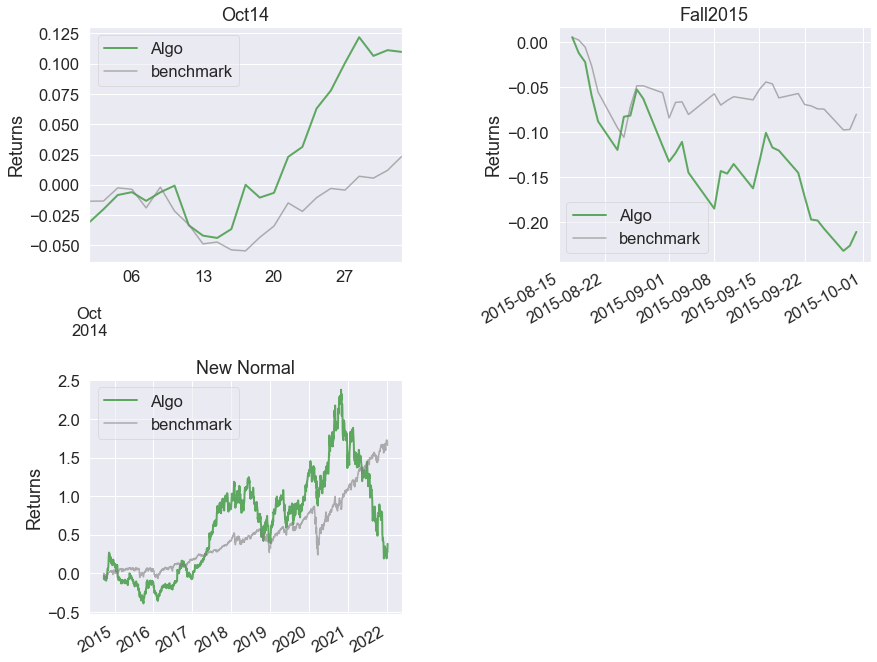

In [97]:
pf.create_full_tear_sheet(stcok_price['Close'].pct_change().dropna(),
                            benchmark_rets=benchmark_price['Close'].pct_change().dropna())